Python implementation of Dijkstra's algorithm for finding shortest paths in a weighted directed graph.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

Here is the main function implementing Dijkstra's algorithm. Two helper functions, one for finding the cheapest node and one for drawing the paths onto the initial graph, are implemented below.

In [ ]:
def dijkstra(pos, edges, root):

  # Instantiate a directed graph as the initial graph
  G = nx.DiGraph()
  G.add_nodes_from(pos)
  G.add_edges_from(edges)

  # Instantiate a directed graph which becomes the set of shortest paths
  D = nx.DiGraph()
  D.add_nodes_from(pos)

  # instatiate a dict w/ nodes as keys and labels as values (a node's label represent cheapest cost to reach the node)
  label_dict = dict.fromkeys(G.nodes())
  for node in label_dict:
    label_dict[node] = float('inf')
  label_dict[root] = 0

  # instantiate a list of partitioned and a list of unpartitioned nodes
  partitioned_nodes = [root]
  unpartitioned_nodes = list(G.nodes)
  unpartitioned_nodes.remove(root)


  # check all unadded adjacent nodes to find next cheapest edge/path.
  # update all reachable nodes w new path length & add the cheapest.

  while unpartitioned_nodes:
    # For all edge (x, y) with x ∈ visited, y ∈ unvisited, if label(x)+cost(x, y) < label(y),
    # set pr(y) = x and label(y) = label(x) + cost(x, y).

    for partitioned_node in partitioned_nodes:

      neighbours = G.neighbors(partitioned_node)

      for neighbour in neighbours:

        edge_cost = edges[partitioned_node, neighbour]

        if label_dict[partitioned_node] + edge_cost < label_dict[neighbour]:

          label_dict[neighbour] = label_dict[partitioned_node] + edge_cost
          nx.set_node_attributes(D, {neighbour: partitioned_node}, name = 'parent')

    cheapest_node, cheapest_label = find_cheapest_label(label_dict, unpartitioned_nodes)  # Find cheapest node and its label
    D.add_edge(D.nodes[cheapest_node]['parent'], cheapest_node)  # Add the cheapest node to the shortest path tree

    partitioned_nodes.append(cheapest_node)
    unpartitioned_nodes.remove(cheapest_node)

  draw_shortest_paths(G, D, pos, edges)

  return label_dict

Helper functions:

In [ ]:
def find_cheapest_label(label_dict, unpartitioned_nodes):
  cheapest_node = unpartitioned_nodes[0]
  cheapest_label = float('inf')

  for node in unpartitioned_nodes:

    if label_dict[node] < cheapest_label:
      cheapest_node = node
      cheapest_label = label_dict[node]

  return (cheapest_node, cheapest_label)

def draw_shortest_paths(G, T, node_positions, edge_weights):

    T_complement = nx.difference(G, T)
    node_labels = {node: f'${node}$' for node in G.nodes()}

    edge_style_common = {'node_size': 600, 'arrowstyle': '->', 'arrowsize': 10}

    nx.draw_networkx_edges(T, node_positions, width=5, edge_color='tab:blue', alpha=0.7, **edge_style_common)
    nx.draw_networkx_edges(T_complement, node_positions, width=4, alpha=0.15, **edge_style_common)

    node_style = {'node_size': 600, 'node_color': 'tab:blue', 'alpha': 0.9}
    label_style = {'labels': node_labels, 'font_color': 'white'}

    nx.draw_networkx_nodes(G, node_positions, **node_style)
    nx.draw_networkx_labels(G, node_positions, **label_style)
    nx.draw_networkx_edge_labels(G, node_positions, edge_weights)

    ax = plt.gca()
    plt.tight_layout()
    plt.axis("off")
    plt.show()

    return 0

Here we construct the graph we will perform Dijkstra's algorithm on:

In [ ]:
node_pos_dict = {'a': (-100,0), 'b': (-100,100), 'c': (0,100),
                 'd': (100,100), 'e': (100,0), 'f': (100,-100), 'g': (0,-100), 'h':(0,0), 'r': (-100,-100)}

edge_dict = {('r','a'): 1, ('r','g'): 2, ('r','h'): 9, ('a','b'): 2, ('a','c'): 3, ('a','h'): 7,
              ('c','d'): 3, ('b','c'): 2, ('c','h'): 1, ('h','d'): 1, ('h','e'): 1, ('e','d'): 1,
               ('g','f'): 0, ('f','e'): 5,('g','e'): 5 ,('g','h'): 6}
edge_dict = dict(sorted(edge_dict.items(), key=lambda item: item[1]))

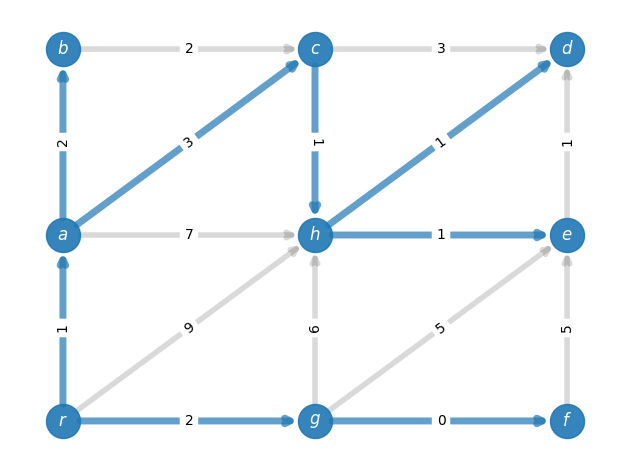

{'a': 1, 'b': 3, 'c': 4, 'd': 6, 'e': 6, 'f': 2, 'g': 2, 'h': 5, 'r': 0}

In [ ]:
dijkstra(node_pos_dict, edge_dict, 'r')

Here's another example:

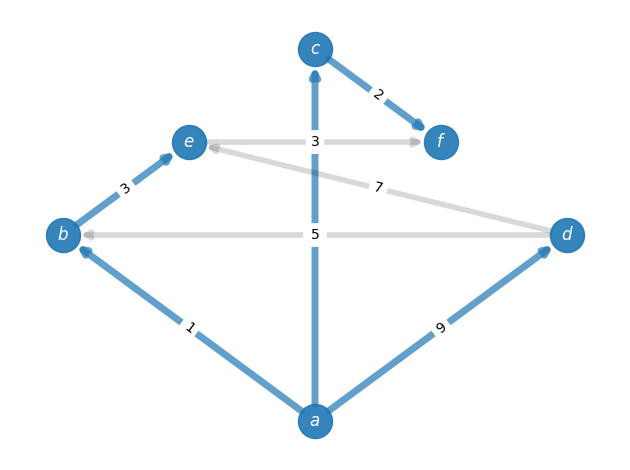

{'a': 0, 'b': 1, 'c': 2, 'd': 9, 'e': 4, 'f': 4}

In [ ]:
pos = {'a': (0,0), 'b': (-50,50), 'c': (0,100), 'd': (50,50), 'e': (-25,75), 'f': (25,75)}

edge_dict = {('a','b'): 1, ('a','c'): 2, ('a','d'): 9, ('d','b'): 5, ('b','e'): 3, ('d','e'): 7,
              ('e','f'): 3, ('c','f'): 2}
edge_dict = dict(sorted(edge_dict.items(), key=lambda item: item[1]))

dijkstra(pos, edge_dict, 'a')